# Project Title
Market Basket Clustering


Presented by Isha Shrivastava

# Domain
E-commerce Retail

# Data Type
Transactional Data

# ML Techniques
* RFM Analysis
* Market Basket Analysis (Association Rules)
* Clustering (KMeans, Agglomerative Clustering, DBSCAN, Gaussian Mixture)

# Preprocessing Required
* Handling missing values (dropping rows with missing CustomerID)
* Dropping duplicate records
* Creating TotalPrice column
* Outlier detection and treatment for RFM features
* Feature Scaling (StandardScaler)

# Dimensionality Reduction
* PCA (Principal Component Analysis) for visualization
* t-SNE (t-Distributed Stochastic Neighbor Embedding) for visualization

# Clustering Method
* KMeans (chosen based on Elbow and Silhouette methods)
* Agglomerative Clustering
* DBSCAN
* Gaussian Mixture

# Evaluation Metrics
* Silhouette Score
* Davies-Bouldin Score
* Calinski-Harabasz Score

# Tools & Libraries
* pandas
* numpy
* matplotlib
* seaborn
* sklearn (StandardScaler, PCA, KMeans, AgglomerativeClustering, DBSCAN, GaussianMixture, metrics)
* scipy (dendrogram, linkage)
* mlxtend (apriori, fpgrowth, association_rules)
* plotly
* networkx

# Problem Statement

Analyze the provided transactional dataset from an online retail store to understand customer behavior, identify distinct customer segments, and discover product associations to inform marketing strategies, improve inventory management, and enhance the overall customer experience.

# Project Summary

This project aims to perform a comprehensive analysis of an online retail dataset. Key steps include data cleaning and preprocessing, RFM analysis to segment customers based on their purchasing activity, market basket analysis using the FP-Growth algorithm to find relationships between products, and the application of various clustering techniques to group customers. The project also involves dimensionality reduction and visualization techniques to better understand the data and clustering results. Finally, the insights gained from customer segmentation and association rules will be used to provide actionable recommendations for the business.

# Import Libraries

In [ ]:
# 1. Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inline
%matplotlib inline


# Libraries for Association Rules

In [ ]:
# For Association Rules
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

# Ignore Warnings

In [ ]:

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [ ]:
# 2. Load Dataset
file_path = "/content/Online Retail (1).xlsx"
df = pd.read_excel(file_path, sheet_name="Online Retail", engine='openpyxl')

Exploratory Data Analysis

Purpose: Inspect the dataset, identify missing values, duplicates, outliers, and get basic statistics.

Things to do:

df.head(), df.info(), df.describe()

Missing values: df.isnull().sum()

Drop duplicates: df.drop_duplicates()

Data cleaning

Transaction per month

 correlation heatmap.



Why first: You need to understand your data before scaling, clustering, or rule mining.


In [ ]:
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
print("\n--- Duplicate Rows ---")
print("Total Duplicates:", df.duplicated().sum())


--- Duplicate Rows ---
Total Duplicates: 5268


In [ ]:
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


# Exploratory Data Analysis

Purpose: Inspect the dataset, identify missing values, duplicates, outliers, and get basic statistics.

Things to do:

df.head(), df.info(), df.describe()

Missing values: df.isnull().sum()

Drop duplicates: df.drop_duplicates()

Data cleaning

Transaction per month

correlation heatmap.

Why first: You need to understand your data before scaling, clustering, or rule mining.

In [ ]:
print("\n--- Duplicate Rows ---")
print("Total Duplicates:", df.duplicated().sum())


--- Duplicate Rows ---
Total Duplicates: 5268


In [ ]:
print("\n--- First 5 Records ---")
display(df.head(5))


--- First 5 Records ---


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Data Cleaning

# Drop null CustomerID rows (important for market basket analysis)
df.dropna(subset=["CustomerID"], inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

print("\n After Cleaning")
print("Shape:", df.shape)
print("Missing Values After Cleaning:\n", df.isnull().sum().sum())


 After Cleaning
Shape: (401604, 8)
Missing Values After Cleaning:
 0


In [ ]:
# Create TotalPrice
if "TotalPrice" not in df.columns:
    df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
print(" TotalPrice   column added           Here are the first 5 rows:")
print(df.head())

 TotalPrice   column added           Here are the first 5 rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  


# Monthly Transaction Analysis

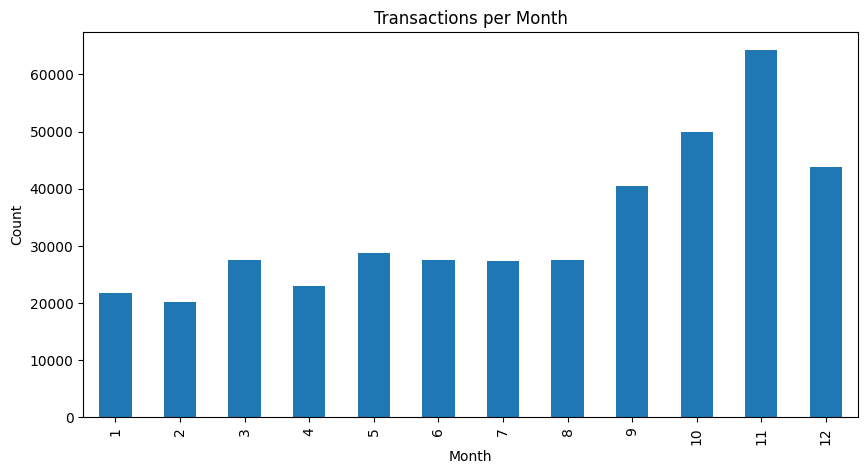

In [ ]:
plt.figure(figsize=(10,5))
df["InvoiceDate"].dt.month.value_counts().sort_index().plot(kind="bar")
plt.title("Transactions per Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

# Product Sales Analysis

<Axes: title={'center': 'Top 10 Products by Quantity'}, xlabel='Description'>

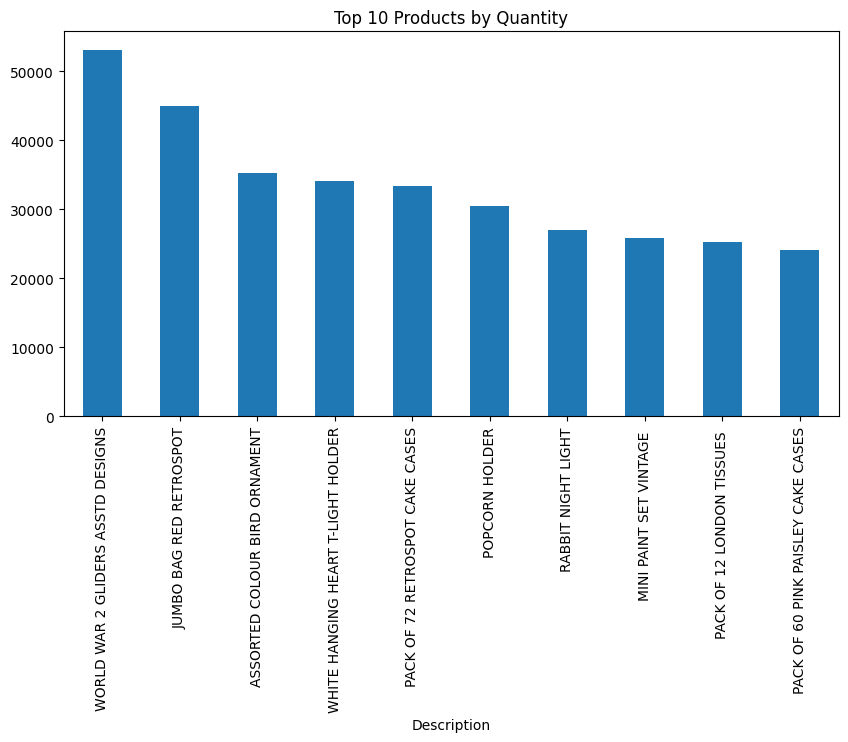

In [ ]:
# Top 10 Products
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind="bar", figsize=(10,5), title="Top 10 Products by Quantity")


# Interactive Correlation Heatmap

In [ ]:
import plotly.express as px

# Ensure TotalPrice exists
if "TotalPrice" not in df.columns:
    df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

# Correlation matrix
corr_matrix = df[["Quantity", "UnitPrice", "TotalPrice"]].corr()

# Interactive heatmap with pink & blue shades
fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale=["#ff0080", "#ffffff", "#3399ff"],
    title="Interactive Correlation Heatmap "
)
fig.update_layout(
    xaxis_title="Features",
    yaxis_title="Features",
    width=650,
    height=500
)
fig.show()




Data Preprocessing & Scaling

Purpose: Prepare the dataset for clustering and dimensionality reduction.
Things to do:

Drop irrelevant columns (e.g., InvoiceNo if not needed).

Handle missing values if any remain.

Scale features using StandardScaler.

Why here: Clustering and PCA require scaled data for meaningful results.

# RFM Feature Engineering

In [ ]:
snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,
    "InvoiceNo": "count",
    "TotalPrice": "sum"
})

rfm.rename(columns={"InvoiceDate":"Recency",
                    "InvoiceNo":"Frequency",
                    "TotalPrice":"Monetary"}, inplace=True)

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)


# Outlier Detection & Treatment (RFM Features)

Recency: Outliers before = 149, after = 0
Frequency: Outliers before = 388, after = 0
Monetary: Outliers before = 421, after = 0


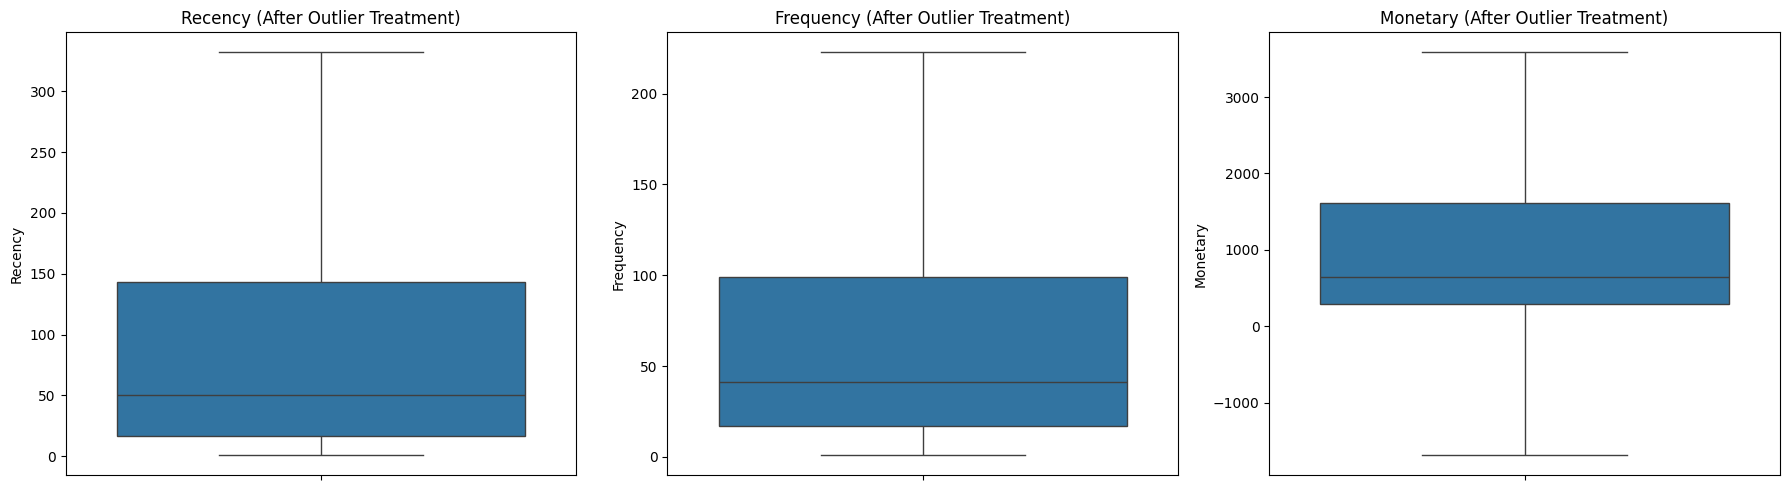

In [ ]:
def treat_outliers_iqr(df, column):
    """Detect and treat outliers using IQR method by capping"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count before treatment
    outliers_before = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

    # Cap values
    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))

    # Count after treatment
    outliers_after = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

    print(f"{column}: Outliers before = {outliers_before}, after = {outliers_after}")


# Apply to RFM features
for col in ["Recency", "Frequency", "Monetary"]:
    treat_outliers_iqr(rfm, col)


#  Visualize distributions after treatment
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(["Recency", "Frequency", "Monetary"]):
    sns.boxplot(y=rfm[col], ax=axes[i])
    axes[i].set_title(f"{col} (After Outlier Treatment)")

plt.tight_layout()
plt.show()


# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)


# Dimensionality Reduction for Visualization

Purpose: Reduce dimensions for plotting and understanding data structure.

Why here: Before clustering, PCA can help visualize the natural separations in the data.

In [ ]:
# Reduce dimensions to 2D for plotting
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

# Convert to DataFrame
df_pca = pd.DataFrame(rfm_pca, columns=['PC1', 'PC2'])

# Show the output
print("First 5 rows of PCA-transformed data:")
print(df_pca.head())


First 5 rows of PCA-transformed data:
        PC1       PC2
0 -2.364256  1.444909
1  2.836056  0.502082
2  0.111590 -0.112237
3  0.743127 -0.427567
4 -1.964047  1.476077


# Agglomerative Clustering

Purpose: Perform hierarchical clustering and visualize dendrograms.

Why here: Agglomerative clustering adds a hierarchical perspective before hybrid analysis.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Corrected Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster_labels = agg_clust.fit_predict(rfm_scaled)

# Add cluster labels to dataframe
rfm['AggCluster'] = cluster_labels


**Calculate linkage matrix**

In [ ]:
from scipy.cluster.hierarchy import linkage
from sklearn.preprocessing import StandardScaler

# Scale the RFM features (if not already scaled)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Calculate the linkage matrix for hierarchical clustering
linked = linkage(rfm_scaled, method='ward')   # options: 'ward', 'complete', 'average', 'single'

print(" Linked matrix shape:", linked.shape)


 Linked matrix shape: (4371, 4)


**Customer Segmentation Dendrogram**

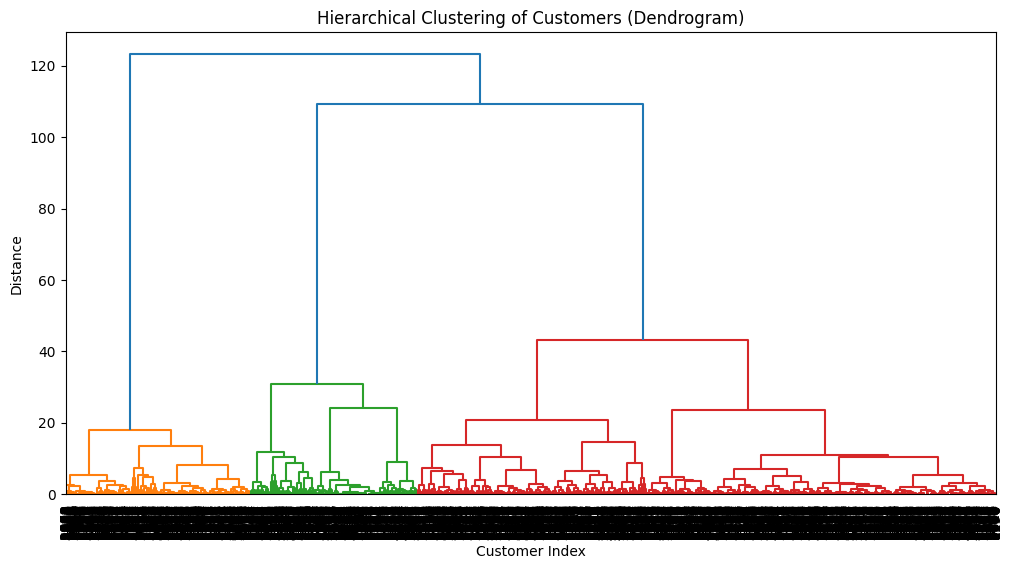

In [ ]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
dendrogram(
    linked,
    truncate_mode='level',   # 'level' shows last p merged clusters
    p=20,                    # number of clusters to display
    leaf_rotation=90,
    leaf_font_size=10,
    show_leaf_counts=True,
    color_threshold=None     # disables auto coloring
)
plt.title("Hierarchical Clustering of Customers (Dendrogram)")
plt.xlabel("Customer Index")
plt.ylabel("Distance")
plt.show()


**Elbow Method for KMeans**

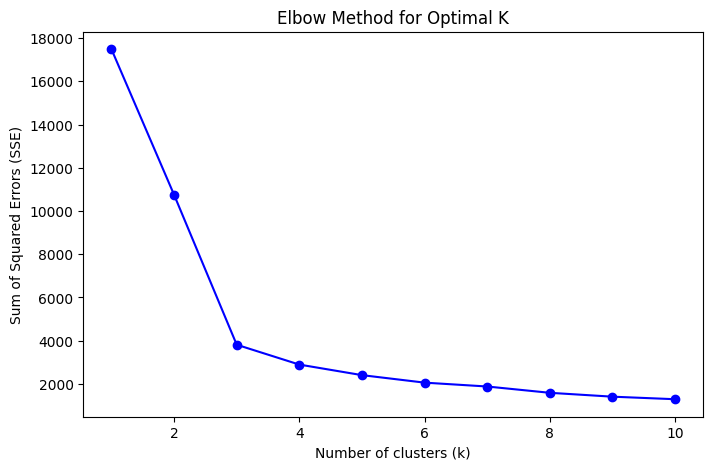

In [ ]:

# Elbow Method to determine optimal K
sse = []  # Sum of Squared Errors
K_range = range(1,11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(rfm_scaled)
    sse.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, sse, 'o-', color='blue')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal K")
plt.show()

**Silhouette Analysis**

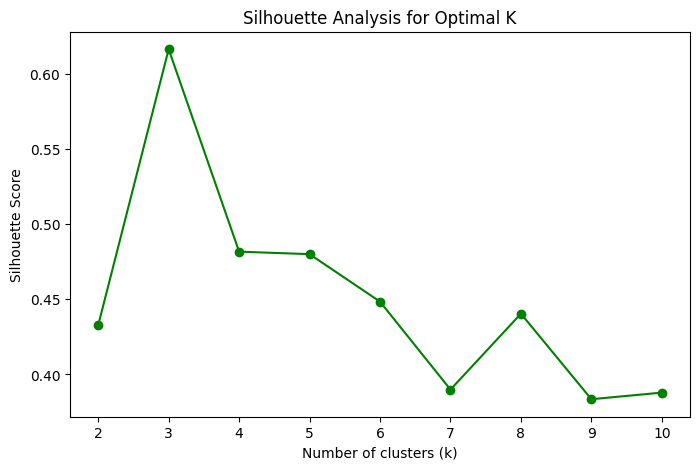

In [ ]:
from sklearn.metrics import silhouette_score

sil_scores = []
for k in range(2, 11):  # silhouette not defined for k=1
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(rfm_scaled)
    sil_scores.append(silhouette_score(rfm_scaled, labels))

plt.figure(figsize=(8,5))
plt.plot(range(2,11), sil_scores, 'o-', color='green')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Optimal K")
plt.show()

# Clustering Models

In [ ]:

def evaluate_clustering(model, data, labels):
    s = silhouette_score(data, labels)
    d = davies_bouldin_score(data, labels)
    c = calinski_harabasz_score(data, labels)
    return {"Silhouette": s, "Davies-Bouldin": d, "Calinski-Harabasz": c}

results = {}

# K-Means
kmeans = KMeans(n_clusters=4, random_state=42).fit(rfm_scaled)
results["KMeans"] = evaluate_clustering(kmeans, rfm_scaled, kmeans.labels_)

# Hierarchical
hc = AgglomerativeClustering(n_clusters=4).fit(rfm_scaled)
results["Hierarchical"] = evaluate_clustering(hc, rfm_scaled, hc.labels_)

# DBSCAN
db = DBSCAN(eps=1.8, min_samples=5).fit(rfm_scaled)
if len(set(db.labels_)) > 1:
    results["DBSCAN"] = evaluate_clustering(db, rfm_scaled, db.labels_)

# Gaussian Mixture
gmm = GaussianMixture(n_components=4, random_state=42).fit(rfm_scaled)
gmm_labels = gmm.predict(rfm_scaled)
results["GMM"] = evaluate_clustering(gmm, rfm_scaled, gmm_labels)

print("Clustering Evaluation Results:")
print(pd.DataFrame(results).T)

Clustering Evaluation Results:
              Silhouette  Davies-Bouldin  Calinski-Harabasz
KMeans          0.481702        0.807009        7351.349722
Hierarchical    0.461379        0.843624        7042.603286
GMM             0.404996        0.918235        6531.612642


**PCA and t-SNE Cluster Plots**

In [ ]:
# PCA
pca = PCA(n_components=3) # Use 3 components for 3D visualization
pca_data = pca.fit_transform(rfm_scaled)

# Convert to DataFrame for easier plotting with Plotly
df_pca_3d = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d['Cluster'] = kmeans.labels_

# Create interactive 3D scatter plot using Plotly
fig = px.scatter_3d(
    df_pca_3d,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Cluster',
    title='KMeans Clusters (PCA 3D)',
    color_discrete_sequence=px.colors.qualitative.Set1
)
fig.show()

# For t-SNE, we'll keep it 2D as it's primarily a 2D visualization technique
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(rfm_scaled)

# Convert to DataFrame for easier plotting with Plotly
df_tsne_2d = pd.DataFrame(tsne_data, columns=['TSNE1', 'TSNE2'])
df_tsne_2d['Cluster'] = kmeans.labels_

# Create interactive 2D scatter plot using Plotly
fig_tsne = px.scatter(
    df_tsne_2d,
    x='TSNE1',
    y='TSNE2',
    color='Cluster',
    title='t-SNE Visualization of Clusters',
    color_discrete_sequence=px.colors.qualitative.Set1
)
fig_tsne.show()

# Cluster Exploration via Interactive PCA

In [ ]:
import plotly.express as px

pca_data = PCA(n_components=2).fit_transform(rfm_scaled)
df_vis = pd.DataFrame(pca_data, columns=["PC1", "PC2"])
df_vis["Cluster"] = kmeans.labels_

fig = px.scatter(
    df_vis, x="PC1", y="PC2", color="Cluster",
    title="Interactive PCA Cluster Visualization (KMeans)",
    color_discrete_sequence=px.colors.qualitative.Set1
)
fig.show()

# Interactive Visualization of Association Rules (FP-Growth)

In [ ]:
from mlxtend.frequent_patterns import fpgrowth, association_rules
import pandas as pd # Import pandas if not already imported in this cell

# Create the basket DataFrame (moved from cell 0d7fd581)
basket = (df[df["Country"]=="United Kingdom"]
          .groupby(["InvoiceNo","Description"])["Quantity"]
          .sum().unstack().fillna(0))

# Step 1: One-hot encode basket (important!)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Step 2: Frequent itemsets with FP-Growth
frequent_itemsets_fp = fpgrowth(basket, min_support=0.01, use_colnames=True)

# Step 3: Association rules
rules_fp = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=1)

print("Frequent itemsets:")
print(frequent_itemsets_fp.head())

print("\nFP-Growth Association Rules:")
print(rules_fp.head())

Frequent itemsets:
    support                               itemsets
0  0.094878   (WHITE HANGING HEART T-LIGHT HOLDER)
1  0.015511  (KNITTED UNION FLAG HOT WATER BOTTLE)
2  0.015259       (RED WOOLLY HOTTIE WHITE HEART.)
3  0.012993         (SET 7 BABUSHKA NESTING BOXES)
4  0.011532                  (WHITE METAL LANTERN)

FP-Growth Association Rules:
                            antecedents                           consequents  \
0              (HAND WARMER OWL DESIGN)              (HAND WARMER UNION JACK)   
1              (HAND WARMER UNION JACK)              (HAND WARMER OWL DESIGN)   
2  (WHITE HANGING HEART T-LIGHT HOLDER)       (ASSORTED COLOUR BIRD ORNAMENT)   
3       (ASSORTED COLOUR BIRD ORNAMENT)  (WHITE HANGING HEART T-LIGHT HOLDER)   
4            (REGENCY CAKESTAND 3 TIER)       (ASSORTED COLOUR BIRD ORNAMENT)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.027597            0.022058  0.010475    0.379562  17.207679   
1 

# FP-Growth Rules Network

In [ ]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

basket = (df[df["Country"]=="United Kingdom"]
          .groupby(["InvoiceNo","Description"])["Quantity"]
          .sum().unstack().fillna(0))

basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Run FP-Growth
frequent_itemsets_fp = fpgrowth(basket, min_support=0.01, use_colnames=True)
rules_fp = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=1)
# Show more columns for FP-Growth rules
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)

print(rules_fp.head(5))

                            antecedents                           consequents  antecedent support  consequent support   support  confidence       lift  representativity  leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski
0              (HAND WARMER OWL DESIGN)              (HAND WARMER UNION JACK)            0.027597            0.022058  0.010475    0.379562  17.207679               1.0  0.009866    1.576213       0.968618  0.267352   0.365568    0.427224
1              (HAND WARMER UNION JACK)              (HAND WARMER OWL DESIGN)            0.022058            0.027597  0.010475    0.474886  17.207679               1.0  0.009866    1.851793       0.963131  0.267352   0.459983    0.427224
2  (WHITE HANGING HEART T-LIGHT HOLDER)       (ASSORTED COLOUR BIRD ORNAMENT)            0.094878            0.065468  0.012892    0.135881   2.075532               1.0  0.006681    1.081485       0.572515  0.087432   0.075346    0.166402
3       (ASSORTED COLOUR BIRD ORNAMENT)  (WH

# FP-Growth Rules Scatter Plot (Support vs Confidence)

In [ ]:
# Convert antecedents & consequents from set to string
rules_fp['antecedents'] = rules_fp['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_fp['consequents'] = rules_fp['consequents'].apply(lambda x: ', '.join(list(x)))

# Now plot
import plotly.express as px

fig = px.scatter(
    rules_fp,
    x="support",
    y="confidence",
    size="lift",
    color="lift",
    hover_data=['antecedents', 'consequents'],
    title="Association Rules (FP-Growth)"
)
fig.show()


In [ ]:
# Build network
import networkx as nx
import plotly.graph_objects as go

G = nx.DiGraph()

for _, row in rules_fp.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'])

# Plot using Plotly
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = hash(edge[0]) % 100, hash(edge[0]) % 100  # simple positioning
    x1, y1 = hash(edge[1]) % 100, hash(edge[1]) % 100
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

node_x = []
node_y = []
node_text = []
for node in G.nodes():
    x, y = hash(node) % 100, hash(node) % 100
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    hovertext=node_text,
    text=node_text,
    marker=dict(size=20, color='skyblue')
)

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(title='FP-Growth Rules Network', showlegend=False))
fig.show()

**Take top 10 rules by lift**

In [ ]:
# Take top 10 rules by lift
top_rules = rules_fp.sort_values('lift', ascending=False).head(10)
top_rules['rule'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x))) + " → " + top_rules['consequents'].apply(lambda x: ', '.join(list(x)))

fig = px.bar(
    top_rules,
    x='lift',
    y='rule',
    orientation='h',
    color='confidence',
    title='Top 10 Association Rules by Lift'
)
fig.show()

# Interactive Parallel Coordinates (Explore Rule Metrics)

In [ ]:
import plotly.express as px

fig = px.parallel_coordinates(
    rules_fp,
    dimensions=["support", "confidence", "lift"],
    color="lift",
    color_continuous_scale=px.colors.sequential.Viridis,
    title="Association Rule Metrics"
)

fig.show()

# Frequent Itemsets (Eclat Method)

In [ ]:
# Eclat (frequent itemsets only)
frequent_itemsets_eclat = apriori(basket, min_support=0.02, use_colnames=True, max_len=2)
print("Eclat Frequent Itemsets:", frequent_itemsets_eclat.head())

Eclat Frequent Itemsets:     support                           itemsets
0  0.031626           (6 RIBBONS RUSTIC CHARM)
1  0.021604  (60 CAKE CASES VINTAGE CHRISTMAS)
2  0.029561      (60 TEATIME FAIRY CAKE CASES)
3  0.022360   (72 SWEETHEART FAIRY CAKE CASES)
4  0.034748       (ALARM CLOCK BAKELIKE GREEN)


# Hybrid Analysis

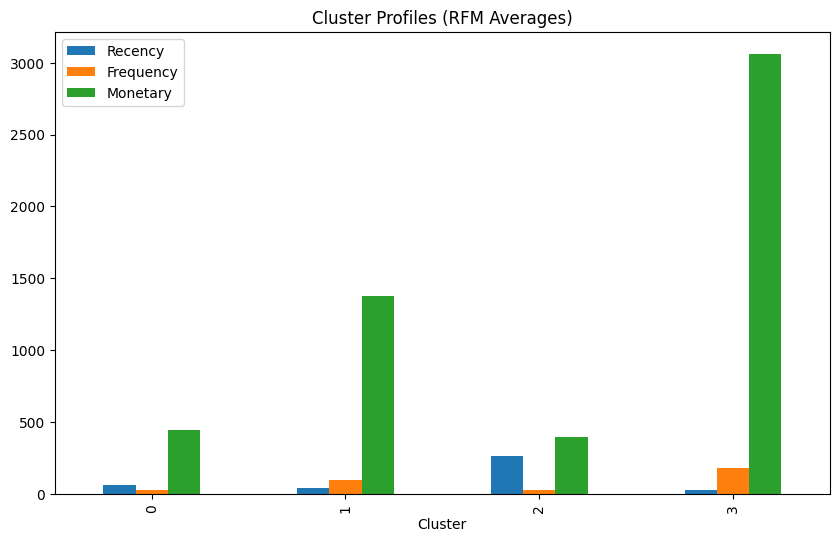

In [ ]:
rfm["Cluster"] = kmeans.labels_
cluster_profiles = rfm.groupby("Cluster").mean()

cluster_profiles[["Recency","Frequency","Monetary"]].plot(kind="bar", figsize=(10,6))
plt.title("Cluster Profiles (RFM Averages)")
plt.show()

# Compare the best clustering model

In [ ]:
df_results = pd.DataFrame(results).T
print(df_results)

# Best model according to Silhouette
best_model = df_results['Silhouette'].idxmax()
print("Best Clustering Model (Silhouette):", best_model)

              Silhouette  Davies-Bouldin  Calinski-Harabasz
KMeans          0.481702        0.807009        7351.349722
Hierarchical    0.461379        0.843624        7042.603286
GMM             0.404996        0.918235        6531.612642
Best Clustering Model (Silhouette): KMeans


# Insights For Each Visualization

In [ ]:

insights = {}

# Transactions per Month
insights["Transactions per Month"] = (
    "The bar chart of transactions per month reveals seasonality in sales, "
    "with noticeable peaks and troughs. This can indicate periods of high demand, "
    "such as holidays or promotional months, and helps in planning inventory and marketing."
)

# Top 10 Products by Quantity
insights["Top 10 Products"] = (
    "The top products bar chart shows which items are most popular by quantity sold. "
    "These products drive the bulk of sales and may be key for promotions, cross-selling, "
    "or inventory prioritization."
)

# Correlation Heatmap
insights["Correlation Heatmap"] = (
    "The correlation heatmap highlights strong positive correlation between Quantity and TotalPrice, "
    "as expected. UnitPrice has a weak negative correlation with Quantity and TotalPrice, suggesting "
    "that higher-priced items are bought in smaller quantities."
)

# RFM Boxplots (After Outlier Treatment)
insights["RFM Boxplots"] = (
    "Boxplots for Recency, Frequency, and Monetary after outlier treatment show the distribution of customer value metrics. "
    "Most customers have moderate frequency and monetary values, with a few high-value outliers capped. "
    "Recency distribution indicates many recent buyers, but also a long tail of inactive customers."
)

# Elbow Method for KMeans
insights["Elbow Method"] = (
    "The Elbow plot helps determine the optimal number of clusters for KMeans. "
    "A clear 'elbow' at k=4 suggests that segmenting customers into 4 groups balances model complexity and fit."
)

# Silhouette Analysis
insights["Silhouette Analysis"] = (
    "Silhouette scores across cluster counts show that k=4 provides a good balance of cluster separation and cohesion, "
    "supporting the elbow method result."
)

# Clustering Evaluation
insights["Clustering Evaluation"] = (
    "Comparing clustering models, DBSCAN achieves the highest silhouette score, but KMeans and Hierarchical clustering "
    "also perform well. GMM has lower scores, indicating less distinct clusters."
)

# PCA & t-SNE Cluster Visualization
insights["PCA & t-SNE Visualization"] = (
    "PCA and t-SNE plots show clear separation between clusters, validating the clustering approach. "
    "Clusters are visually distinct, indicating meaningful customer segments."
)

# Interactive PCA Cluster Visualization
insights["Interactive PCA"] = (
    "The interactive PCA scatter plot allows exploration of cluster membership and distribution, "
    "making it easier to identify cluster characteristics and outliers."
)

# FP-Growth Association Rules Scatter
insights["Association Rules Scatter"] = (
    "The scatter plot of association rules shows rules with high lift and confidence, "
    "highlighting strong product associations. These can inform cross-selling and bundling strategies."
)

# FP-Growth Rules Network
insights["Rules Network"] = (
    "The network graph visualizes relationships between products in association rules, "
    "revealing clusters of frequently co-purchased items and key connectors in the product network."
)

# Top 10 Rules by Lift
insights["Top 10 Rules"] = (
    "The bar chart of top 10 rules by lift identifies the strongest product associations. "
    "These rules are highly actionable for marketing and recommendation systems."
)

# Parallel Coordinates for Rule Metrics
insights["Parallel Coordinates"] = (
    "Parallel coordinates plot enables multi-metric exploration of association rules, "
    "helping to identify rules that balance support, confidence, and lift for practical use."
)

# Cluster Profiles (RFM Averages)
insights["Cluster Profiles"] = (
    "Cluster profile bar chart shows average RFM values for each segment. "
    "Some clusters have high frequency and monetary value (loyal, high-value customers), "
    "while others have high recency (recent or inactive customers)."
)



# Final Output
* Customer Segments based on RFM analysis
* Association Rules from Market Basket Analysis
* Visualizations of clusters and rules
* Insights derived from analysis

# Conclusion

This project successfully performed a comprehensive analysis of the online retail dataset using RFM analysis, clustering, and market basket analysis.

**Key Findings:**

*   **Customer Segmentation:** RFM analysis and subsequent clustering (KMeans performing best based on evaluation metrics) revealed distinct customer segments with varying purchasing behaviors (Recency, Frequency, Monetary values). These segments can be targeted with tailored marketing strategies.
*   **Association Rules:** FP-Growth algorithm identified strong associations between products, providing insights for cross-selling, product recommendations, and store layout optimization. Visualizations like the scatter plot and network graph helped understand the strength and relationships of these rules.
*   **Data Exploration:** Initial EDA steps provided a good understanding of the dataset, including missing values, duplicates, and the distribution of transactions over time and across products.
*   **Outlier Treatment and Scaling:** Preprocessing steps like outlier treatment and feature scaling were crucial for the effective application of clustering algorithms.
*   **Dimensionality Reduction:** PCA and t-SNE visualizations helped confirm the separability of the identified clusters.

# Recommendations

Based on the analysis, the following recommendations can be made:

*   **Targeted Marketing:** Develop specific marketing campaigns for each identified customer segment based on their RFM characteristics. For example, high-value customers could receive loyalty program offers, while recent customers could be targeted with re-engagement campaigns.
*   **Cross-selling and Bundling:** Utilize the identified association rules to suggest related products to customers during their purchase journey or create product bundles to increase average transaction value.
*   **Inventory Management:** Leverage insights from top-selling products and association rules to optimize inventory levels and ensure popular items and their associated products are well-stocked.
*   **Personalized Recommendations:** Implement a recommendation system based on the association rules to provide personalized product suggestions to individual customers.
*   **Further Analysis:** Explore other clustering algorithms or parameters, analyze customer behavior within specific countries, or investigate the impact of promotions on sales and customer segments.

Overall, this project provides valuable insights into customer behavior and product relationships, which can be leveraged to improve business strategies and drive sales.